<div class="alert alert-block alert-success">
    <h1 align="center">Estimation of the deaths due to tsunami</h1>
    <h3 align="center">Machine Learning Project</h3>
</div>

<div>
<img src="./img/Tsunami.jpg" width="800" height="500"/>
</div>

## Abstract

* A tsunami is a series of extremely long waves caused by a large and sudden displacement of the ocean, usually the result of an earthquake below or near the ocean floor. This force creates waves that radiate outward in all directions away from their source, sometimes crossing entire ocean basins. Unlike wind-driven waves, which only travel through the topmost layer of the ocean, tsunamis move through the entire water column, from the ocean floor to the ocean surface.
* A lot of work has been done in the field of tsunami prediction, but we still haven't achieved this technology. As a result of this natural phenomenon, a large number of people lose their lives. If we have a correct estimate of the number of people killed when this phenomenon occurs, we can have a correct understanding of the damage caused by the flood and also organize relief operations based on that.

## Steps

The following steps are taken to train a model to find the death toll for a tsunami:
1. Import libraries
2. Load dataset and EDA
3. Data Pre-processing (Find missing values and cleaning data)
4. Visualization
5. Prepare data for traning
6. Model implementation and training and check some metrics

## step1
### Importing necessary libraries

In [5]:
import os, math
import numpy as np
import pandas as pd
import geopandas as gpd

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import streamlit as st
from streamlit_folium import st_folium

import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

ImportError: cannot import name 'ValueFieldName' from 'streamlit.type_util' (/Users/milad/opt/miniconda3/lib/python3.9/site-packages/streamlit/type_util.py)

## Step2
### Loading dataset and EDA

* **A brief introduction to dataset:**  
This dataset, also known as The Global Historical Tsunami Database, represents historical tsunamis and related information and provides information on over 2,400 tsunamis from 2100 BC to the present in the Atlantic, Indian, and Pacific Oceans; and the Mediterranean and Caribbean Seas.

    Note that due to the long time span covered in this dataset the quality of the data varies considerably.
    The trustworthiness of easy row is depicted in the EVENT_VALIDITY column.

* **Loading dataset**  
First we download dataset from [link](https://www.kaggle.com/datasets/andrewmvd/tsunami-dataset) and add the .csv file to same folder with our .ipynb code. Then we should read the csv file with pandas.

In [6]:
df = pd.read_csv("./tsunami_dataset.csv")

* **EDA**  
Now we need to perform EDA process to better understand the dataset. For example, it is necessary to have enough information about the columns and the number of data, as well as the missing values, etc., so that we can continue the work better.

In [7]:
df.head()

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,LATITUDE,LONGITUDE,LOCATION_NAME,COUNTRY,...,CAUSE,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY,DAMAGE_TOTAL_DESCRIPTION,HOUSES_TOTAL_DESCRIPTION,DEATHS_TOTAL_DESCRIPTION,URL,COMMENTS
0,12,-330,NaN,NaN,NaN,NaN,40.00,25.000,"E. SPORADES ISLANDS, AEGEAN ISLANDS",GREECE,...,Earthquake,Very Doubtful Tsunami,7.0,NaN,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"330 B.C. Aegean Sea, Sporades Islands, 40 N 25..."
1,481,1764,2.0,11.0,NaN,NaN,51.45,-2.583,"BRISTOL, ENGLAND",UK,...,Unknown,Very Doubtful Tsunami,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"Reference #1894, in full: ""On Saturday the 11t..."
2,71,859,NaN,NaN,NaN,NaN,36.08,36.250,SAMANDAGI,TURKEY,...,Earthquake,Questionable Tsunami,NaN,NaN,3.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"859 (possibly 861), November. Levantian Sea, N..."
3,186,1580,1.0,NaN,NaN,NaN,40.00,128.000,YELLOW SEA,NORTH KOREA,...,Unknown,Very Doubtful Tsunami,NaN,NaN,1.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,<P><blockquote><i>Reference #414:</i></blockqu...
4,5,-1300,NaN,NaN,NaN,NaN,39.96,26.240,"IONIAN COASTS, TROAD",TURKEY,...,Unknown,Questionable Tsunami,6.0,NaN,5.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,1300 B.C. Ionian and Aegean Seas. References t...


* save dataframe shape and its columns name and also show them. because often this data is needed so we save them.

In [8]:
data_shape = df.shape
print("shape of our dataset is :\n", data_shape)

columns = df.columns
print("columns name:\n", columns)

shape of our dataset is :
 (2259, 21)
columns name:
 Index(['ID', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'LATITUDE', 'LONGITUDE',
       'LOCATION_NAME', 'COUNTRY', 'REGION', 'CAUSE', 'EVENT_VALIDITY',
       'EQ_MAGNITUDE', 'EQ_DEPTH', 'TS_INTENSITY', 'DAMAGE_TOTAL_DESCRIPTION',
       'HOUSES_TOTAL_DESCRIPTION', 'DEATHS_TOTAL_DESCRIPTION', 'URL',
       'COMMENTS'],
      dtype='object')


* we can find a brief introduction to our dataset with below code. It tells us type of each coulumn and number of Non-null values and number of columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2259 non-null   int64  
 1   YEAR                      2259 non-null   int64  
 2   MONTH                     2155 non-null   float64
 3   DAY                       2082 non-null   float64
 4   HOUR                      1308 non-null   float64
 5   MINUTE                    1235 non-null   float64
 6   LATITUDE                  2259 non-null   float64
 7   LONGITUDE                 2259 non-null   float64
 8   LOCATION_NAME             2250 non-null   object 
 9   COUNTRY                   2259 non-null   object 
 10  REGION                    2258 non-null   object 
 11  CAUSE                     2258 non-null   object 
 12  EVENT_VALIDITY            2259 non-null   object 
 13  EQ_MAGNITUDE              1474 non-null   float64
 14  EQ_DEPTH

* We need to know the number of different value calsses in each class.

In [6]:
df.nunique()

ID                          2259
YEAR                         513
MONTH                         12
DAY                           31
HOUR                          24
MINUTE                        60
LATITUDE                    1334
LONGITUDE                   1579
LOCATION_NAME                861
COUNTRY                      103
REGION                        22
CAUSE                         10
EVENT_VALIDITY                 5
EQ_MAGNITUDE                  52
EQ_DEPTH                     103
TS_INTENSITY                  32
DAMAGE_TOTAL_DESCRIPTION       4
HOUSES_TOTAL_DESCRIPTION       4
DEATHS_TOTAL_DESCRIPTION       4
URL                         2259
COMMENTS                    2083
dtype: int64

* Number of null values in each column is mentioned below

In [7]:
df.isnull().sum()

ID                             0
YEAR                           0
MONTH                        104
DAY                          177
HOUR                         951
MINUTE                      1024
LATITUDE                       0
LONGITUDE                      0
LOCATION_NAME                  9
COUNTRY                        0
REGION                         1
CAUSE                          1
EVENT_VALIDITY                 0
EQ_MAGNITUDE                 785
EQ_DEPTH                    1352
TS_INTENSITY                1158
DAMAGE_TOTAL_DESCRIPTION    1204
HOUSES_TOTAL_DESCRIPTION    1653
DEATHS_TOTAL_DESCRIPTION    1585
URL                            0
COMMENTS                     164
dtype: int64

* Also we can find some statistical information about the earthquake magnitude and depth and tsunami intensity. These parameters may affect our results and its good to know these.
* Also We need These info about all possible columns because it can help us for data preprosseing and fill NaN values with good estimations

In [8]:
df.describe()

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,LATITUDE,LONGITUDE,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY
count,2259.000000,2259.000000,2155.000000,2082.000000,1308.000000,1235.000000,2259.000000,2259.000000,1474.000000,907.000000,1101.000000
mean,2332.022134,1819.188136,6.622738,15.700768,11.318807,28.353846,17.002135,40.346320,7.046676,36.298787,1.376985
std,1665.174408,354.081686,3.460098,8.656968,6.979589,17.223160,27.730844,104.605369,0.796125,41.098547,1.840800
min,1.000000,-2000.000000,1.000000,1.000000,0.000000,0.000000,-63.000000,-179.971000,3.200000,0.000000,-4.140000
25%,1090.500000,1835.500000,4.000000,8.000000,5.000000,14.000000,-5.000000,-70.200000,6.600000,17.000000,0.500000
50%,1932.000000,1909.000000,7.000000,16.000000,11.000000,29.000000,23.000000,34.400000,7.000000,31.000000,1.500000
75%,3353.000000,1968.000000,10.000000,23.000000,18.000000,43.000000,38.670000,137.832500,7.600000,40.000000,3.000000
max,5753.000000,2020.000000,12.000000,31.000000,23.000000,59.000000,71.813000,179.984000,9.500000,600.000000,9.000000


* We need some extera information about our target column (DEATHS_TOTAL_DESCRIPTION). So we can use value_counts to find number of each classes in our target column and nunique() to find number of classes.

In [9]:
df['DEATHS_TOTAL_DESCRIPTION'].nunique()

4

In [10]:
df['DEATHS_TOTAL_DESCRIPTION'].value_counts()

Few (~1 to 50 people)               310
Many (~101 to 1000 people)          172
Very Many (~1001 or more people)    131
Some (~51 to 100 people)             61
Name: DEATHS_TOTAL_DESCRIPTION, dtype: int64

## Step3
### Data Pre-processing

* A brief description about dataset null values:

In [11]:
df.isnull().sum()

ID                             0
YEAR                           0
MONTH                        104
DAY                          177
HOUR                         951
MINUTE                      1024
LATITUDE                       0
LONGITUDE                      0
LOCATION_NAME                  9
COUNTRY                        0
REGION                         1
CAUSE                          1
EVENT_VALIDITY                 0
EQ_MAGNITUDE                 785
EQ_DEPTH                    1352
TS_INTENSITY                1158
DAMAGE_TOTAL_DESCRIPTION    1204
HOUSES_TOTAL_DESCRIPTION    1653
DEATHS_TOTAL_DESCRIPTION    1585
URL                            0
COMMENTS                     164
dtype: int64

* Unfortunately, the number of missing values in our target column is high, and this causes us to have little data to train our model, and as a result, we cannot have high accuracy in forecasting.  
* Probably, some other columns, such as tsunami intensity, will be important for us as input to the model. It is also clear that there may be data that contains the necessary information in the target column, but the corresponding entry has a NaN value, and if we want to remove them, the data required for training will be very less. So it is necessary to estimate some of them with methods such as averaging and interpolation, etc.

1. some columns have a few null values so we can drop them

In [12]:
df = df.dropna(subset=['LOCATION_NAME', 'REGION', 'CAUSE'])

2. we can fill MINUTE and day with median because I think we cant have good estimate for them and their domain is large and also their values isnt really related to our target

In [13]:
df['MINUTE'].fillna(df['MINUTE'].median(), inplace=True)
df['DAY'].fillna(df['DAY'].median(), inplace=True)

3. for month we can fill NaNs with month that maximum Tsunamies occurs in them.

In [14]:
df['MONTH'].fillna(df['MONTH'].value_counts().idxmax(), inplace=True)

4. The hour is an important parameter. Because, for example, if it is night and many people are sleeping, the possibility of increasing the number of dead will increase. Therefore, it cannot be estimated carelessly because it can be effective in predicting our goal. On the other hand, since the number of missing values is large, it is not possible to delete all of them. I think the best way is to place with the average.

In [15]:
df['HOUR'].fillna(df['HOUR'].mean(), inplace=True)

5. for magnitude and depth and intensity I think the best estimate for fill NaNs is mean.

In [16]:
df['EQ_MAGNITUDE'].fillna(df['EQ_MAGNITUDE'].mean(), inplace=True)
df['EQ_DEPTH'].fillna(df['EQ_DEPTH'].mean(), inplace=True)
df['TS_INTENSITY'].fillna(df['TS_INTENSITY'].mean(), inplace=True)

6. at the end we can drop remain NaN values in our target column

In [17]:
df = df.dropna(subset=['DEATHS_TOTAL_DESCRIPTION'])

* after cleaning we can see the null values number status. some coulmns have null values but they are not important for us. forexampel DAMAGE_TOTAL_DESCRIPTION and HOUSES_TOTAL_DESCRIPTION cant be as an entry to our models and we find their data after happening a tsunami.

In [18]:
df.isnull().sum()

ID                            0
YEAR                          0
MONTH                         0
DAY                           0
HOUR                          0
MINUTE                        0
LATITUDE                      0
LONGITUDE                     0
LOCATION_NAME                 0
COUNTRY                       0
REGION                        0
CAUSE                         0
EVENT_VALIDITY                0
EQ_MAGNITUDE                  0
EQ_DEPTH                      0
TS_INTENSITY                  0
DAMAGE_TOTAL_DESCRIPTION     68
HOUSES_TOTAL_DESCRIPTION    211
DEATHS_TOTAL_DESCRIPTION      0
URL                           0
COMMENTS                     15
dtype: int64

## Step4
### Visualization

* ### plot location vs tsunami  
  
    First, we want to see the distribution of earthquakes. In fact, by doing this, we will find out if our data is sufficient for different places or if it may have a location dependency. In fact, if 90% of the data is only related to Europe, it is not necessarily possible to use the obtained model for other places as well.

* The map below shows the number of earthquakes in each place. As you can see, we have enough data from different areas where tsunamis occur a lot.

In [19]:
loc_tsunami_map1 = folium.Map(location=[0.0, 0.0], tiles='cartodbpositron', zoom_start=1.8)

mc = MarkerCluster()
for idx, row in df.iterrows():
    mc.add_child(Marker([row['LATITUDE'], row['LONGITUDE']]))

loc_tsunami_map1.add_child(mc)
loc_tsunami_map1

* Heatmap can also be used to see the points mentioned above.

In [20]:
loc_tsunami_map2 = folium.Map(location=[0.0, 0.0], tiles='cartodbpositron', zoom_start=1.8)

HeatMap(data=df[['LATITUDE', 'LONGITUDE']], radius=10).add_to(loc_tsunami_map2)

loc_tsunami_map2

* ### plot location vs intensity of tsunami  
  
    Since tsunami intensity is an important parameter to achieve our goal in this model, it is good to know if we have data with different tsunami intensities or not.

In [21]:
loc_intensity_map = folium.Map(location=[0, 0], tiles='openstreetmap', zoom_start=2.4)

for i in range(0,len(df)):
    Circle(
        location=[df.iloc[i]['LATITUDE'], df.iloc[i]['LONGITUDE']],
        radius=df.iloc[i]['TS_INTENSITY']*20000,
        color='red', fill=True).add_to(loc_intensity_map)

loc_intensity_map

* ### plot Deaths vs. Tsunamis  
  
With the help of the chart below, we can find out how much data we have from the tsunamis that have occurred for each of the different categories for the number of people killed. For example, for the some category, the number of data is small, or it can also be interpreted that the death due to tsunamis was either very low or high.

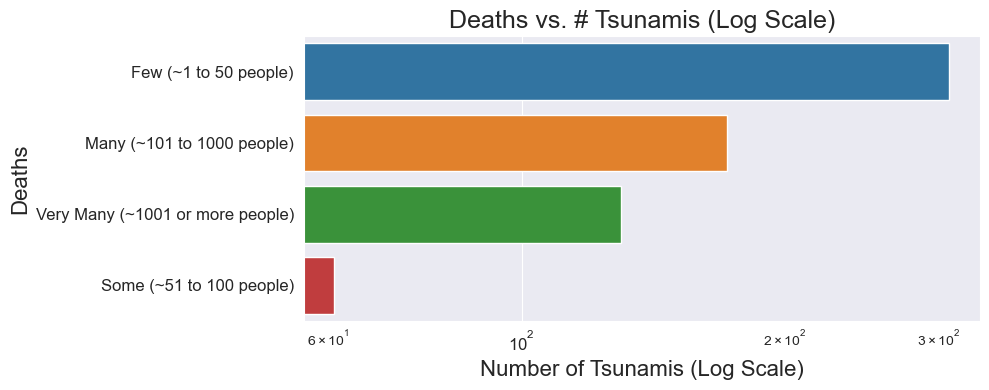

In [22]:
plt.figure(figsize=(10,4))
ax = sns.countplot(y="DEATHS_TOTAL_DESCRIPTION", data=df, order=df["DEATHS_TOTAL_DESCRIPTION"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Deaths vs. # Tsunamis (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Tsunamis (Log Scale)",fontsize=16)
ax.set_ylabel("Deaths",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

Now we want to see if there is a logical and modelable effect between some parameters and our target parameter, which is the number of dead people, or not.  
Also first we need to Encode traget values to reasonable numbers for plotting. so we do like this:
* 'Few (~1 to 50 people)':  25  
* 'Some (~51 to 100 people)':  75  
* 'Many (~101 to 1000 people)':  500  
* 'Very Many (~1001 or more people)':  1000

In [23]:
df['DEATHS_TOTAL_DESCRIPTION_PLOT']=df['DEATHS_TOTAL_DESCRIPTION'].map({'Few (~1 to 50 people)':25,'Some (~51 to 100 people)':75,'Many (~101 to 1000 people)':500,'Very Many (~1001 or more people)':1000})

* ### plot country vs number of deaths  
  
A country may have different death tolls depending on how advanced it is or how likely a tsunami is to occur. For example, if a country is not very advanced in terms of building houses or there are no shelters for tsunamis and floods, then the death toll may be higher. 

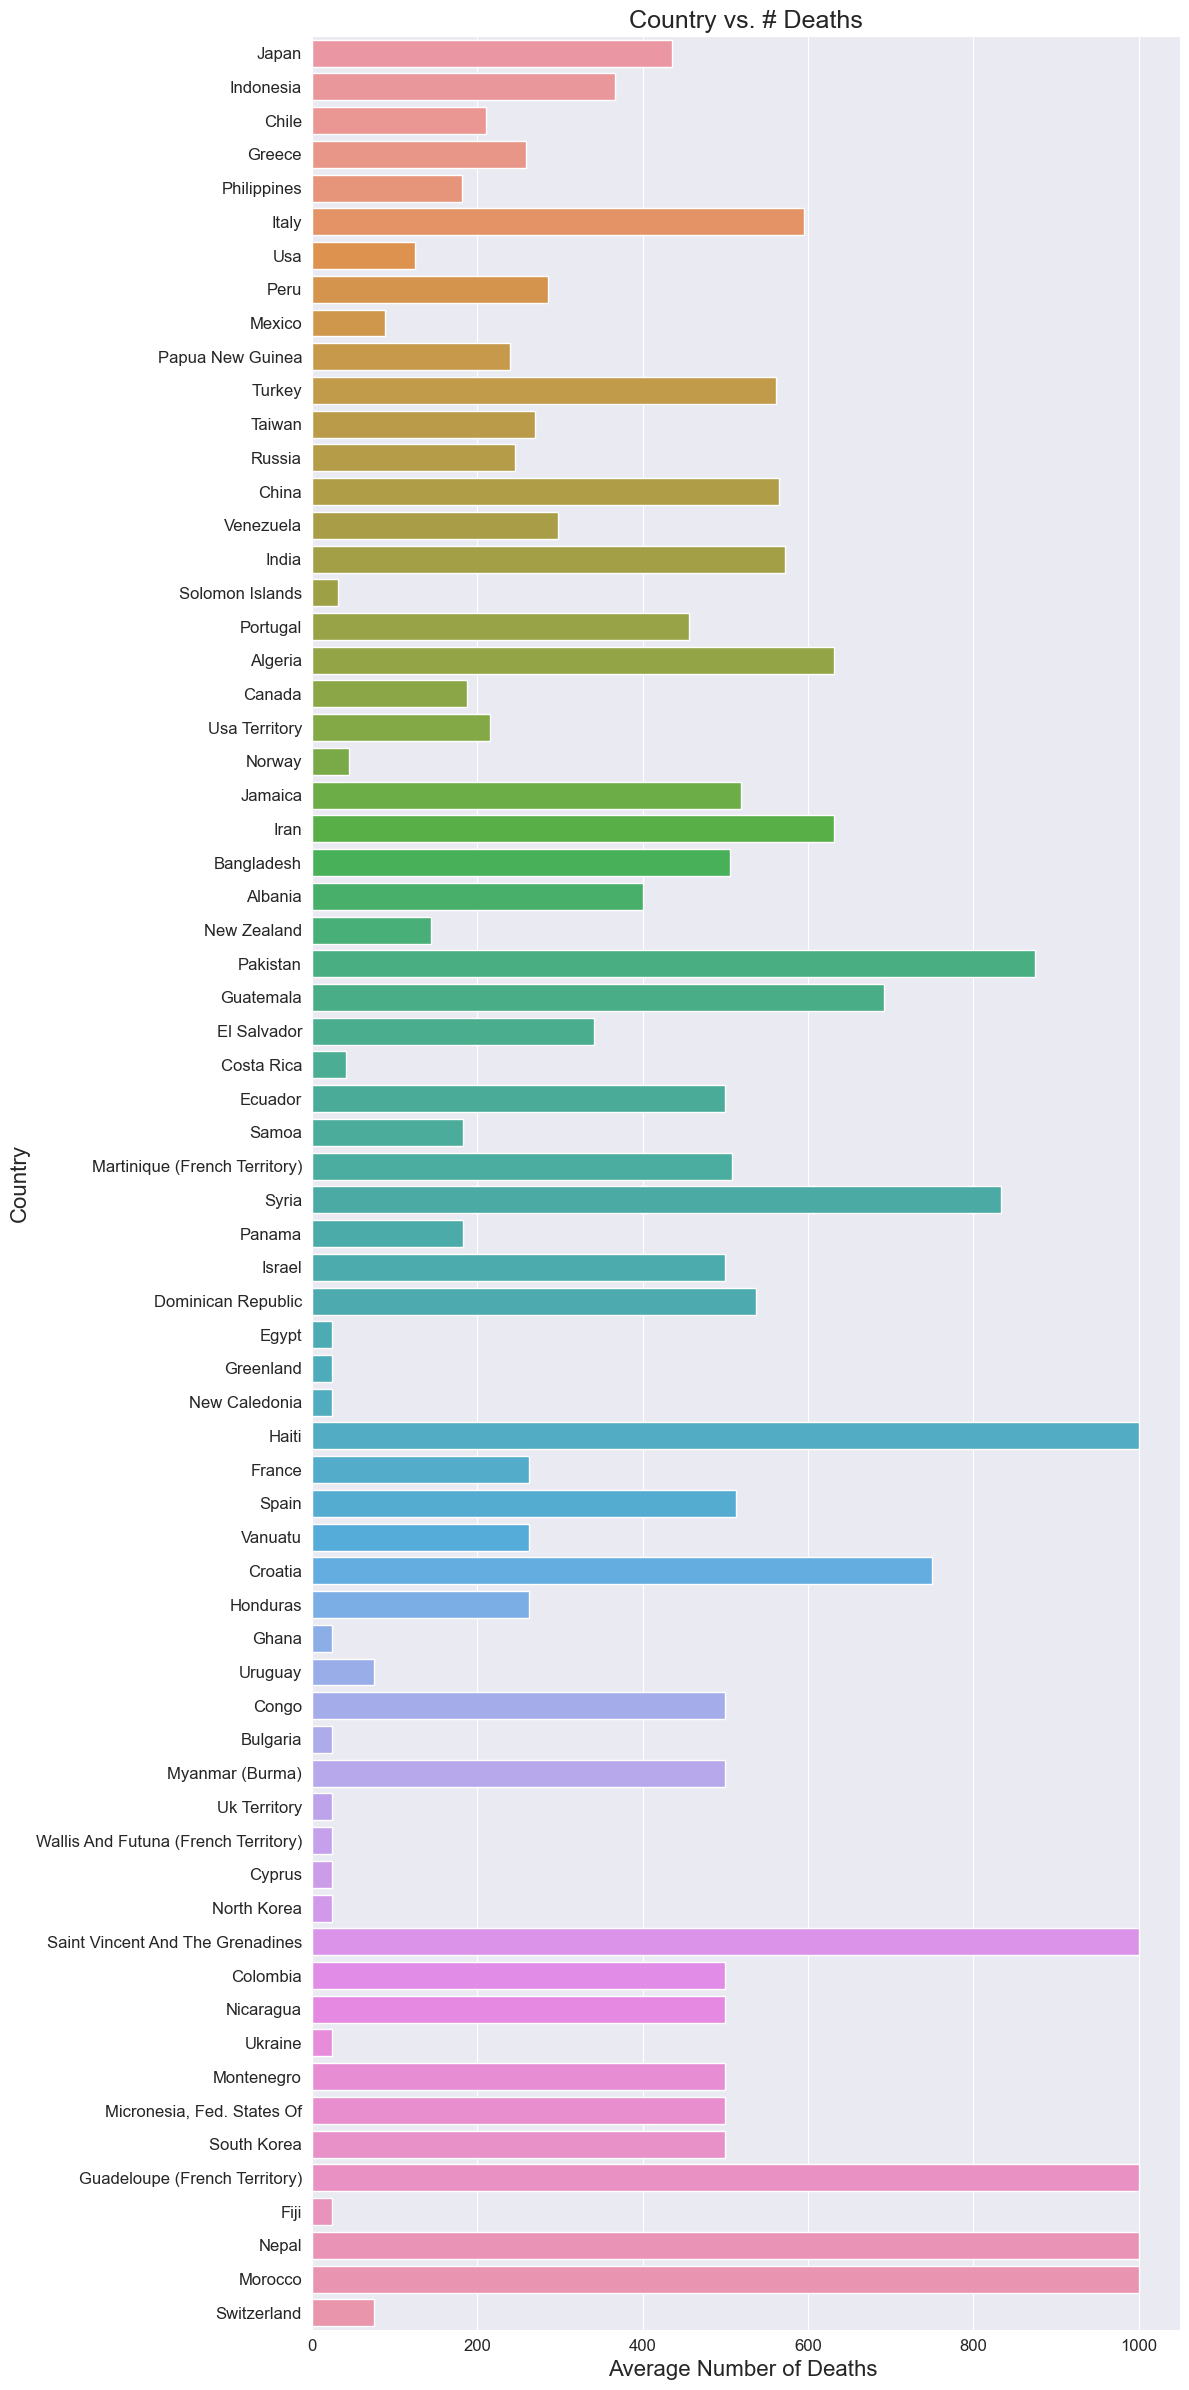

In [24]:
country_death = {}
countries = list(map(lambda x: x.title(), df["COUNTRY"].value_counts().keys().tolist()))
for country in countries:
    country_death[country] = df.loc[df["COUNTRY"]==country.upper()]['DEATHS_TOTAL_DESCRIPTION_PLOT'].mean()
keys = list(country_death.keys())
vals = [country_death[k] for k in keys]

plt.figure(figsize=(12,24))
ax = sns.barplot(x=vals, y=keys)
ax.axes.set_title("Country vs. # Deaths",fontsize=18)
ax.set_xlabel("Average Number of Deaths ",fontsize=16)
ax.set_ylabel("Country",fontsize=16)
ax.tick_params(labelsize=12)
ax.set_yticklabels(countries, rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

* ### plot Earthquake Magnitude vs number of deaths  
  
    The magnitude of the earthquake can be an effective factor in the number of people killed. As can be seen in the graph below, it can be said that the higher the magnitude of the earthquake, the higher the number of people killed. But this one parameter alone may not be enough to predict the number of dead.

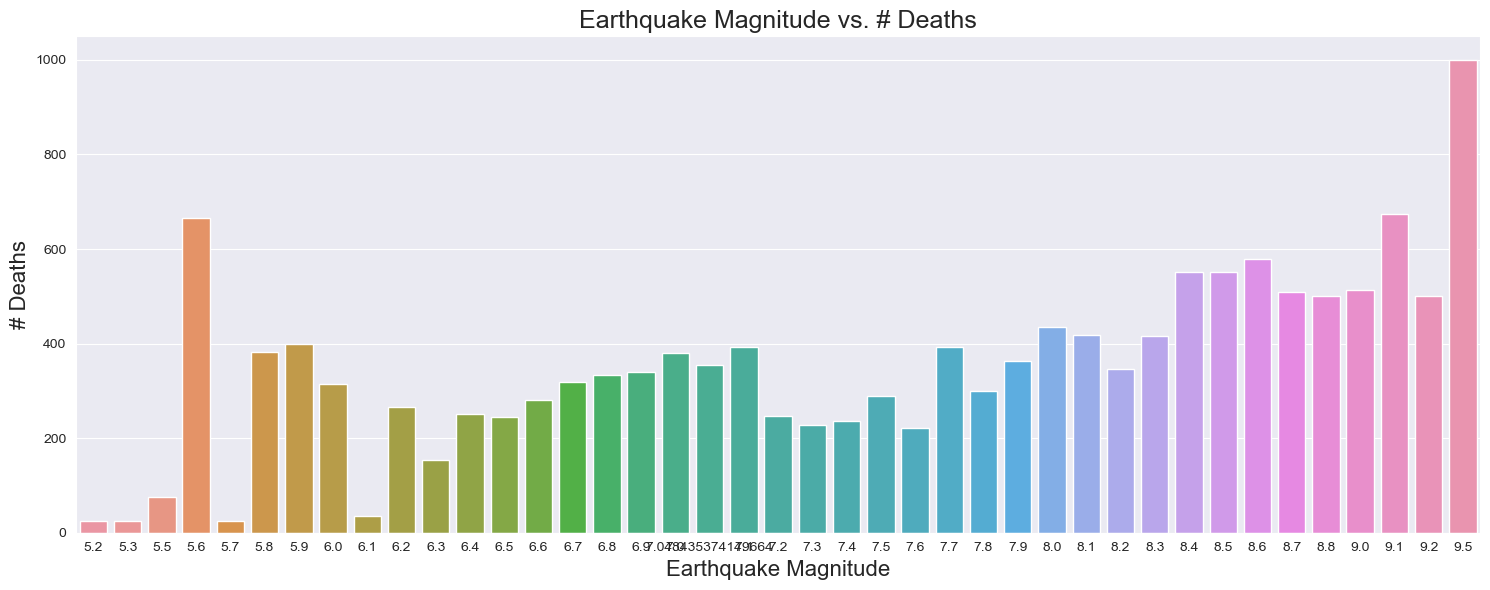

In [25]:
magnitude_death = {}
magnitudes = list(map(lambda x: x, df["EQ_MAGNITUDE"].value_counts().keys().tolist()))
for magnitude in magnitudes:
    magnitude_death[magnitude] = df.loc[df["EQ_MAGNITUDE"]==magnitude]['DEATHS_TOTAL_DESCRIPTION_PLOT'].mean()
keys = list(magnitude_death.keys())
vals = [magnitude_death[k] for k in keys]

plt.figure(figsize=(15,6))
ax = sns.barplot(x=keys, y=vals)
ax.axes.set_title("Earthquake Magnitude vs. # Deaths",fontsize=18)
ax.set_xlabel("Earthquake Magnitude",fontsize=16)
ax.set_ylabel("# Deaths",fontsize=16)
ax.tick_params(labelsize=10)
plt.tight_layout()
plt.show()

* ### plot Tsunami Intensity vs number of deaths  
  
It seems that the higher the intensity of the tsunami, the higher the number of people killed, but it is possible that there is not enough data available for many tsunamis such as intensity 9. As seen in the graph, the intensity of the tsunami alone is not a sufficient parameter to estimate the number of dead.

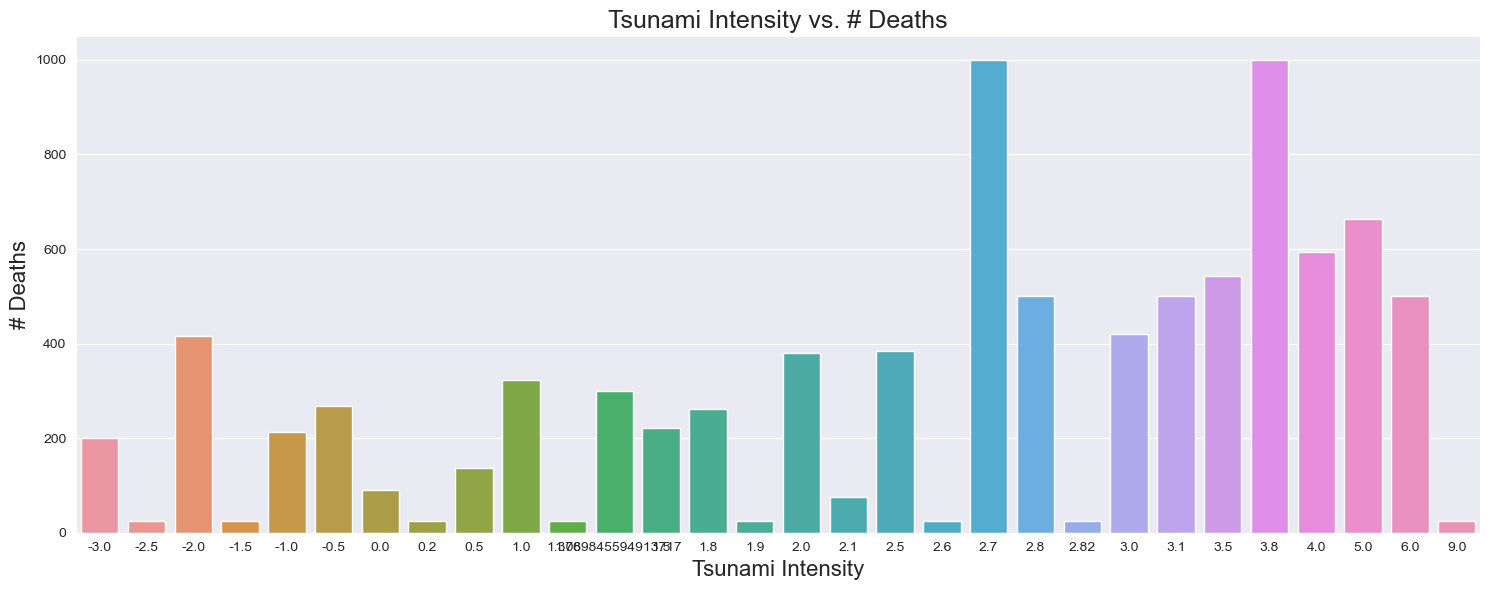

In [26]:
intensity_death = {}
intensities = list(map(lambda x: x, df["TS_INTENSITY"].value_counts().keys().tolist()))
for intensity in intensities:
    intensity_death[intensity] = df.loc[df["TS_INTENSITY"]==intensity]['DEATHS_TOTAL_DESCRIPTION_PLOT'].mean()
keys = list(intensity_death.keys())
vals = [intensity_death[k] for k in keys]

plt.figure(figsize=(15,6))
ax = sns.barplot(x=keys, y=vals)
ax.axes.set_title("Tsunami Intensity vs. # Deaths",fontsize=18)
ax.set_xlabel("Tsunami Intensity",fontsize=16)
ax.set_ylabel("# Deaths",fontsize=16)
ax.tick_params(labelsize=10)
plt.tight_layout()
plt.show()

## Step5
### Prepare data for traning

* #### Encoding:  
  
The machine learning model only understands the number and therefore we have to convert the categorical data that we need in our model into a numerical value.

first we encode our target column:

In [27]:
df['DEATHS_TOTAL_DESCRIPTION']=df['DEATHS_TOTAL_DESCRIPTION'].map({'Few (~1 to 50 people)':0,'Some (~51 to 100 people)':1,'Many (~101 to 1000 people)':2,'Very Many (~1001 or more people)':3})

I think 'COUNTRY' and 'REGION' and 'CAUSE' columns are needed. so we should encode them because they are categorical.

In [28]:
enc = OrdinalEncoder()
df[["COUNTRY","REGION", "CAUSE"]] = enc.fit_transform(df[["COUNTRY","REGION", "CAUSE"]])

* #### Corrolation matrix:  

Correlation matrix is needed for this reason to see which columns our target column depends on and which columns have the most influence in finding the value of the target column. 
As can be seen, the year, region and intensity and magnitude of the tsunami have the greatest effect. In order to understand from the correlation matrix which column's values have an effect in predicting the value of our target column, it is necessary to see which columns have the highest value recorded at the intersection with our target column.

In [29]:
corr = df.corr()
corr

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,LATITUDE,LONGITUDE,COUNTRY,REGION,CAUSE,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY,DEATHS_TOTAL_DESCRIPTION,DEATHS_TOTAL_DESCRIPTION_PLOT
ID,1.000000,0.309106,-0.025045,-0.012204,0.073194,0.026775,0.008267,-0.152317,-0.038382,0.031785,0.043858,-0.109455,-0.100537,-0.140140,-0.166870,-0.145550
YEAR,0.309106,1.000000,-0.055605,-0.030381,0.013130,-0.001445,-0.191701,-0.056444,-0.033765,0.004074,-0.055535,0.047499,-0.082355,-0.341348,-0.276286,-0.252147
MONTH,-0.025045,-0.055605,1.000000,0.043950,0.011690,-0.003070,0.004105,0.017340,-0.008254,-0.022720,-0.028911,0.053045,0.020245,0.093487,-0.035687,-0.038954
DAY,-0.012204,-0.030381,0.043950,1.000000,-0.019415,0.012327,-0.006563,0.004831,0.042000,0.028651,0.039256,0.017607,0.057360,0.016291,0.017301,0.018034
HOUR,0.073194,0.013130,0.011690,-0.019415,1.000000,0.049268,-0.051537,-0.059394,0.036745,-0.002479,-0.031917,-0.002766,-0.006384,-0.017335,0.015271,0.020711
MINUTE,0.026775,-0.001445,-0.003070,0.012327,0.049268,1.000000,-0.030563,-0.053085,0.014632,0.052122,0.039075,0.021815,-0.006875,-0.043181,0.018034,0.011404
LATITUDE,0.008267,-0.191701,0.004105,-0.006563,-0.051537,-0.030563,1.000000,0.139082,0.211116,-0.350457,0.057364,-0.294412,-0.117271,0.164995,0.140684,0.138462
LONGITUDE,-0.152317,-0.056444,0.017340,0.004831,-0.059394,-0.053085,0.139082,1.000000,0.028191,-0.481093,0.013886,-0.086326,0.019794,-0.085462,0.109427,0.111560
COUNTRY,-0.038382,-0.033765,-0.008254,0.042000,0.036745,0.014632,0.211116,0.028191,1.000000,-0.282133,0.082403,-0.018835,0.004273,-0.101895,-0.064615,-0.079412
REGION,0.031785,0.004074,-0.022720,0.028651,-0.002479,0.052122,-0.350457,-0.481093,-0.282133,1.000000,-0.133115,0.136791,0.058264,0.009997,-0.129911,-0.125588


* #### Splitting the dataset into the Training set and Test set:  

We need Train set for learning our model and test set for evaluation our final model. According to visuallization and corrolation matrix I choose TS_INTENSITY and EQ_MAGNITUDE and REGION as my entry features.

In [30]:
X = df.loc[:,['TS_INTENSITY', 'EQ_MAGNITUDE', 'REGION']].values
y = df['DEATHS_TOTAL_DESCRIPTION'].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

It is necessary to normalize the data before giving it to the model

In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Step6
### Train and test model

* there are differnet models that I examin but RandomForestClassifier is better among them according to metrics result.

In [33]:
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

* Here I show confusion matrix to show how much my model is good. As we can see in last three column we dont have good result. This could be because we don't have enough data from all the output classes. Since our dataset was not clean, we had to delete a large number of data, which led to a lack of suitable data and we did not get the desired result.

<AxesSubplot:>

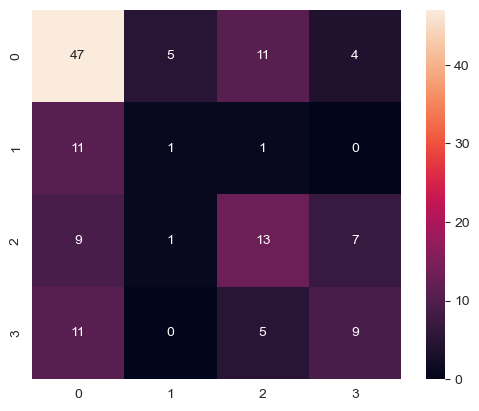

In [34]:
# Evaluating on Test set
y_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True , annot=True)

* Our task was a classification. with classification_report method we can understand some important metrics values of our model predicting. As you can see, in the category related to 0, which was "Few", because the number of data was suitable, we got a good ratio of recall and f 1. But we did not perform well in boiler categories due to lack of data.

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.70      0.65        67
           1       0.14      0.08      0.10        13
           2       0.43      0.43      0.43        30
           3       0.45      0.36      0.40        25

    accuracy                           0.52       135
   macro avg       0.41      0.39      0.40       135
weighted avg       0.49      0.52      0.50       135



* In order to make our analysis more complete, below, according to the definitions we have for each of the metrics, we examined the results more closely. according to confusion matrix we have these results:  
Category --TP -- FP -- FN  
  0 ------------ 47 -- 31 -- 20  
  1 ------------ 1 --- 6 --- 12  
  2 ------------ 13 -- 17 -- 8  
  3 ------------ 9 --- 11 -- 16  
  
1. **Precision Score:** 
    * we know the related formula is:    Precision Score = TP / (FP + TP)
    * The model precision score measures the proportion of positively predicted labels that are actually correct. Precision is also known as the positive predictive value.
    * so for 0 category our TP is higher than FP and precision is good but for 1, 2, 3 the FPs are high and we dont have good precision.  
    
2. **Recall Score:**
    * we know the related formula is:    Recall Score = TP / (FN + TP)
    * Model recall score represents the model’s ability to correctly predict the positives out of actual positives. This is unlike precision which measures how many predictions made by models are actually positive out of all positive predictions made.
    * In the denominator of the fraction, two factors, FN and TP, are effective, and only TP is effective in the case. So, the higher the TP value in the face, the better the recall value. so for 0 category our TP is high and FN is low then recall value is good but for 1, 2, 3 the FNs are high and we dont have good recall.  
    
3. **F1-Score:**
    * we know the related formula is:    F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score)
    * Model F1 score represents the model score as a function of precision and recall score. F-score is a machine learning model performance metric that gives equal weight to both the Precision and Recall for measuring its performance in terms of accuracy, making it an alternative to Accuracy metrics (it doesn’t require us to know the total number of observations). It’s often used as a single value that provides high-level information about the model’s output quality.
    * It can be said that it takes an average between precision and recall, and if the value of these two parameters is high, the value of F1 will also be high, and this issue can be seen in category 0. If the two mentioned parameters have a small value, then the value of F1 will also be small.  
    
4. **Accuracy Score:**  
    * we know the related formula is:     Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)  
    * Model accuracy is a machine learning classification model performance metric that is defined as the ratio of true positives and true negatives to all positive and negative observations. In other words, accuracy tells us how often we can expect our machine learning model will correctly predict an outcome out of the total number of times it made predictions
    * As it can be seen, in the result obtained in the confusion matrix, because the sum of FN and FP values is high, in the end, we did not get a very good accuracy value.